### Import libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
%matplotlib inline

In [4]:
import warnings

warnings.filterwarnings('ignore')

### Import dataset

In [5]:
data = 'C:/Users/PRS/Desktop/AI Content/Dataset/car.data'

df = pd.read_csv(data, header=None)

### Exploratory data analysis

In [6]:
df.shape

(1728, 7)

In [7]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.sample(10)

,0,1,2,3,4,5,6
1451,low,high,3,more,small,high,acc
903,med,vhigh,3,4,med,low,unacc
108,vhigh,high,2,2,small,low,unacc
1688,low,low,4,4,med,high,vgood
160,vhigh,high,3,more,big,med,unacc
126,vhigh,high,2,more,small,low,unacc
594,high,high,4,2,small,low,unacc
980,med,high,2,2,big,high,unacc
520,high,vhigh,5more,2,big,med,unacc
402,vhigh,low,4,more,big,low,unacc


### Rename column names

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

#### Frequency distribution of values in variables

In [13]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
     print(df[col].value_counts()) 

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

#### Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.

These are given by buying, maint, doors, persons, lug_boot, safety and class.

class is the target variable.

#### Explore class variable

In [14]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

### Declare feature vector and target variable

In [15]:
X = df.drop(['class'], axis=1)

y = df['class']

### Split data into separate training and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

### Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [18]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

#### Encode categorical variables
Now, I will encode the categorical variables.

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all the variables are ordinal categorical data type.

In [20]:
import category_encoders as ce

In [21]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [23]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building.

### Decision Tree Classifier with criterion gini index

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

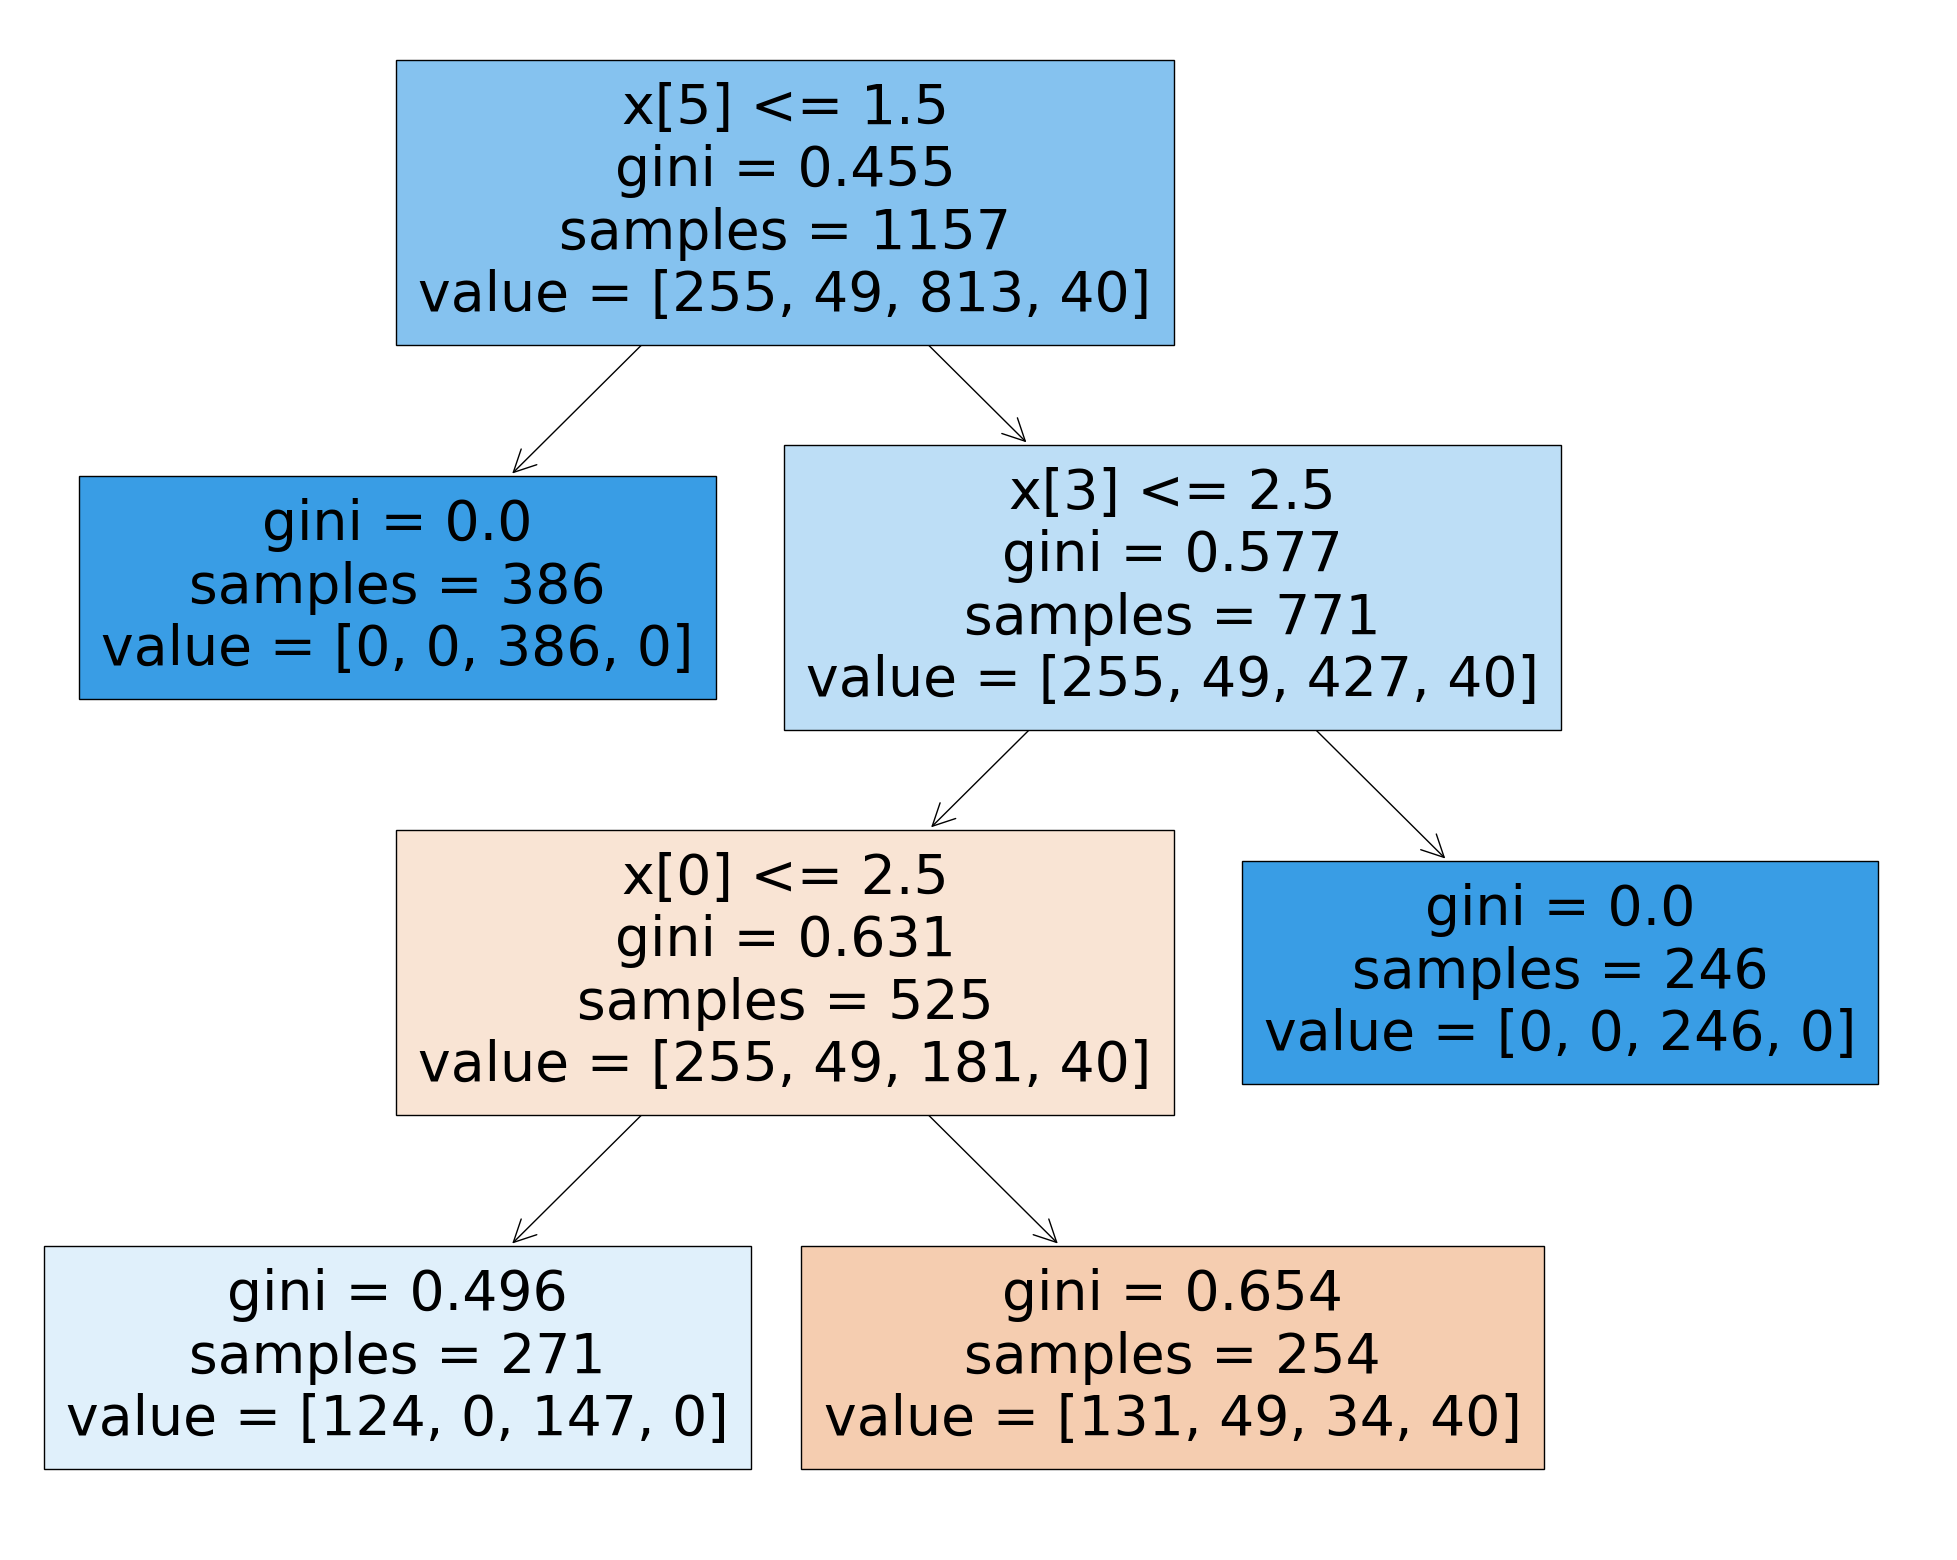

In [28]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf_gini, 
                   filled=True)

#### Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

#### Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

### Check for overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

### Decision Tree Classifier with criterion entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

#### Predict the Test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

#### Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

#### Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

#### Check for overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

### Classification Report
**Classification report** is another way to evaluate the classification model performance. It displays the **precision, recall, f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))